### Libraries 

In [46]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

### Some Libraries initialization

In [ ]:
nnfs.init()

### Class Definitions

In [39]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [40]:
#test class Layer_Dense, Passed
dense_test = Layer_Dense(2, 5)
dense_test.forward([[1,2], [3,4], [5,6]])
print("Weights\n", dense_test.weights, "Biases\n", dense_test.biases)
print("Layer output\n", dense_test.output)

Weights
 [[-0.00431124 -0.00169797 -0.01082465 -0.03186417 -0.00070681]
 [ 0.00089238 -0.00336037 -0.01189598  0.00589226  0.00686545]] Biases
 [[0. 0. 0. 0. 0.]]
Layer output
 [[-0.00252648 -0.00841871 -0.03461661 -0.02007964  0.01302408]
 [-0.0093642  -0.0185354  -0.08005787 -0.07202344  0.02534135]
 [-0.01620191 -0.02865209 -0.12549913 -0.12396724  0.03765862]]


In [41]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [42]:
#test calss Activation_ReLU
Relu_test = Activation_ReLU()
Relu_test.forward(dense_test.output)
print(Relu_test.output)

[[0.         0.         0.         0.         0.01302408]
 [0.         0.         0.         0.         0.02534135]
 [0.         0.         0.         0.         0.03765862]]


In [43]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs,
                                           axis=1,
                                           keepdims=True))
        probabilities = exp_values / np.sum(exp_values,
                                           axis=1,
                                           keepdims=True)
        self.output = probabilities

In [44]:
#test class Activation_Softmax
softmax_test =  Activation_Softmax()
softmax_test.forward(Relu_test.output)
print(softmax_test.output)

[[0.199477   0.199477   0.199477   0.199477   0.202092  ]
 [0.19897864 0.19897864 0.19897864 0.19897864 0.20408546]
 [0.19847662 0.19847662 0.19847662 0.19847662 0.2060935 ]]


### Data preparation and visualization

In [45]:
X, y = spiral_data(samples=100, classes=3)

<function matplotlib.pyplot.show(close=None, block=None)>

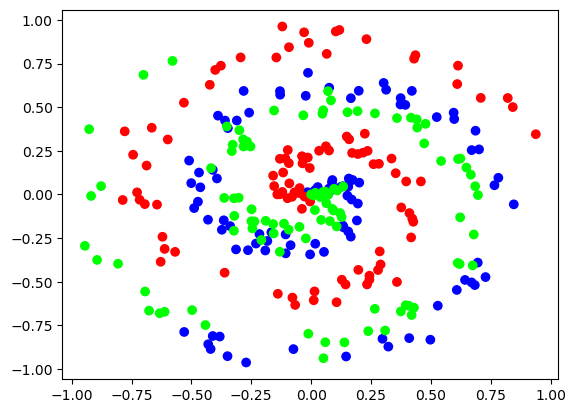

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show

### Network Architecture

In [50]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

### Network flow

In [52]:
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33333288 0.3333332  0.33333392]
 [0.33333317 0.33333328 0.33333355]
 [0.33333196 0.33333292 0.33333511]
 [0.33333155 0.3333328  0.33333565]]


In [54]:
np.sum(activation2.output[:5], 
       axis=1, 
       keepdims=True)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])